# **Video Analytics - YOLO Model Training**

**Author:** [Yi-Jie Wong](https://www.linkedin.com/in/wongyijie/) & [Wingates Voon](https://www.linkedin.com/in/wingates-voon-5858391a0/) & [Yan-Chai Hum](https://www2.utar.edu.my/cv/index.jsp?cv=humyc&reqPageId=aboutMe)<br>
**GitHub:** [Video Analytics](https://github.com/AIProjectsOrg/VARepo)<br>
**Date created:** 2025/06/17<br>
**Last modified:** 2025/07/19<br>
**Description:** Train YOLOv8 for Smoking Detection in CCTV

Pipeline Definition
1.   **Setup Dependencies**
2.   **Setup Dataset**
3.   **Training only on CCTV Dataset**
4.   **Training only on Combined Dataset**
5.   **Synthetic Dataset**
5.   **Training with the additional Synthetic Dataset**
6.   **Evaluation on CCTV Dataset**
7.   **Export**

## **Step 1: Setup Dependencies**

In [ ]:
!pip install ultralytics==8.3.168

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip install roboflow==1.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


## **Step 2: Setup Dataset**

In [ ]:
# Dataset 1: CCTV Smoking Dataset

from roboflow import Roboflow
rf = Roboflow(api_key="rvc5pEYx6sd3cZ8EBcDW")
project = rf.workspace("smoking-gqlqh").project("smoking-cctv-detection-x4fjr")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Smoking-CCTV-Detection-4 in yolov8:: 100%|██████████| 426/426 [00:00<00:00, 2562.87it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Dataset 2: Diverse Angle Smoking Dataset

from roboflow import Roboflow
rf = Roboflow(api_key="rvc5pEYx6sd3cZ8EBcDW")
project = rf.workspace("smoking-gqlqh").project("smoking-person-detection-2-ijwga")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Combined Dataset = Dataset 1 + Dataset 2

import shutil, os

# make a copy of Dataset 1 as combined-dataset
shutil.copytree("/content/Smoking-CCTV-Detection-4", "/content/combined-dataset")

# copy Dataset 2 to combined-dataset
!cp -r "/content/Smoking-Person-Detection-2-1/train/images" "/content/combined-dataset/train/"
!cp -r "/content/Smoking-Person-Detection-2-1/train/labels" "/content/combined-dataset/train/"

!cp -r "/content/Smoking-Person-Detection-2-1/valid/images" "/content/combined-dataset/valid/"
!cp -r "/content/Smoking-Person-Detection-2-1/valid/labels" "/content/combined-dataset/valid/"

!cp -r "/content/Smoking-Person-Detection-2-1/test/images" "/content/combined-dataset/test/"
!cp -r "/content/Smoking-Person-Detection-2-1/test/labels" "/content/combined-dataset/test/"

## **Step 3: Training only on CCTV Dataset**

STRATEGY 1: Naive Training

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/Smoking-CCTV-Detection-4/data.yaml", epochs=50, imgsz=640, batch=16, val=False)

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.4MB/s]


New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Smoking-CCTV-Detection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=Fals

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 62.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1719.4±897.8 MB/s, size: 111.3 KB)


train: Scanning /content/Smoking-CCTV-Detection-4/train/labels... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<00:00, 1502.61it/s]

train: New cache created: /content/Smoking-CCTV-Detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 896.2±520.4 MB/s, size: 113.5 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 1283.55it/s]

val: New cache created: /content/Smoking-CCTV-Detection-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G      1.615      3.408       1.51         11        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.18G      1.328      1.915      1.191         15        640: 100%|██████████| 10/10 [00:00<00:00, 10.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.19G      1.274      1.409      1.153          3        640: 100%|██████████| 10/10 [00:00<00:00, 10.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.21G       1.18      1.142      1.131          7        640: 100%|██████████| 10/10 [00:00<00:00, 11.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      1.152      1.076      1.116         16        640: 100%|██████████| 10/10 [00:00<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G      1.126      1.065        1.1          5        640: 100%|██████████| 10/10 [00:00<00:00, 12.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.26G      1.156      1.043      1.118          5        640: 100%|██████████| 10/10 [00:00<00:00, 11.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.29G      1.096     0.9435      1.057         18        640: 100%|██████████| 10/10 [00:00<00:00, 11.69it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.3G      1.158      1.424      1.104          1        640: 100%|██████████| 10/10 [00:00<00:00, 10.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.32G       1.09     0.9056      1.084          9        640: 100%|██████████| 10/10 [00:00<00:00, 11.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.34G      1.147      1.081      1.117          2        640: 100%|██████████| 10/10 [00:00<00:00, 12.55it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.36G     0.9984     0.8433      1.037          8        640: 100%|██████████| 10/10 [00:00<00:00, 11.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.38G      1.098     0.8782      1.077         13        640: 100%|██████████| 10/10 [00:00<00:00, 11.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.39G      1.007     0.8749      1.033          2        640: 100%|██████████| 10/10 [00:00<00:00, 12.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.41G      1.028     0.8189      1.058         10        640: 100%|██████████| 10/10 [00:00<00:00, 11.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.43G     0.9977     0.7986      1.043         12        640: 100%|██████████| 10/10 [00:00<00:00, 12.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.44G      1.029     0.7855      1.047          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.46G      1.077     0.8793      1.093          5        640: 100%|██████████| 10/10 [00:00<00:00, 12.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.48G     0.9483     0.7159     0.9968         11        640: 100%|██████████| 10/10 [00:00<00:00, 12.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.49G     0.9619     0.7592      1.032          5        640: 100%|██████████| 10/10 [00:00<00:00, 12.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.51G     0.9694     0.7258      1.009          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.53G     0.9332     0.6987     0.9927         20        640: 100%|██████████| 10/10 [00:00<00:00, 11.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.54G      0.925     0.6848       1.01         10        640: 100%|██████████| 10/10 [00:00<00:00, 11.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.56G     0.9312     0.6877      1.003          4        640: 100%|██████████| 10/10 [00:00<00:00, 11.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.58G     0.9504     0.6692     0.9821         10        640: 100%|██████████| 10/10 [00:00<00:00, 11.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.6G     0.9108     0.6768     0.9847          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.62G     0.9095     0.6496     0.9902         14        640: 100%|██████████| 10/10 [00:00<00:00, 12.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.63G     0.9017     0.6553     0.9687          6        640: 100%|██████████| 10/10 [00:00<00:00, 10.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.65G     0.8874     0.6352     0.9794         13        640: 100%|██████████| 10/10 [00:00<00:00, 12.63it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.67G     0.8749     0.6183     0.9732         16        640: 100%|██████████| 10/10 [00:00<00:00, 11.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.68G     0.9133     0.6325      0.973          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.66it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.7G     0.8851     0.6323     0.9851          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.72G     0.8735     0.6067     0.9814         12        640: 100%|██████████| 10/10 [00:00<00:00, 12.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.73G     0.9129     0.6152      0.987          4        640: 100%|██████████| 10/10 [00:00<00:00, 11.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.75G     0.8499     0.5941     0.9771          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.77G     0.8694     0.5954     0.9636         11        640: 100%|██████████| 10/10 [00:00<00:00, 12.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.78G     0.8794     0.6196     0.9857          4        640: 100%|██████████| 10/10 [00:00<00:00, 12.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.8G     0.8356     0.5625     0.9567          8        640: 100%|██████████| 10/10 [00:00<00:00, 12.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.82G     0.8652     0.5921     0.9692          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.83G     0.8616     0.5707     0.9754          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.33it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.85G     0.8165     0.6468      0.919          6        640: 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.87G      0.851     0.6073     0.9292          4        640: 100%|██████████| 10/10 [00:00<00:00, 12.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.88G     0.8049     0.5911     0.9308          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.9G     0.7742     0.5784     0.9225          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.92G      0.792     0.5693     0.9066          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.94G     0.7685     0.5511     0.9072          4        640: 100%|██████████| 10/10 [00:00<00:00, 11.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.95G     0.7702     0.5385     0.9136          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.57it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.97G     0.7671     0.5443      0.907          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.99G     0.7701      0.559     0.9095          5        640: 100%|██████████| 10/10 [00:00<00:00, 11.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         3G     0.7746     0.5352      0.921          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all         41        195      0.769      0.728      0.708      0.449

50 epochs completed in 0.017 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         41        195      0.768      0.728      0.707      0.448
             cigarette         32         33      0.741      0.303      0.297      0.106
                person         41        145       0.96      0.998      0.994        0.8
                 smoke         15         17      0.604      0.882       0.83      0.439
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


STRATEGY 2: Balanced Sampling

In [ ]:
import argparse
from ultralytics import YOLO
from ultralytics.data.dataset import YOLODataset
import ultralytics.data.build as build
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

class YOLOWeightedDataset(YOLODataset):
    def __init__(self, *args, mode="train", **kwargs):
        """
        Initialize the WeightedDataset.

        Args:
            class_weights (list or numpy array): A list or array of weights corresponding to each class.
        """

        super(YOLOWeightedDataset, self).__init__(*args, **kwargs)

        self.train_mode = "train" in self.prefix

        # You can also specify weights manually instead
        self.count_instances()
        class_weights = np.sum(self.counts) / self.counts
        self.agg_func = np.mean

        self.class_weights = np.array(class_weights)
        self.weights = self.calculate_weights()
        self.probabilities = self.calculate_probabilities()

    def count_instances(self):
        """
        Count the number of instances per class

        Returns:
            dict: A dict containing the counts for each class.
        """
        self.counts = [0 for i in range(len(self.data["names"]))]
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)
            for id in cls:
                self.counts[id] += 1

        self.counts = np.array(self.counts)
        self.counts = np.where(self.counts == 0, 1, self.counts)

    def calculate_weights(self):
        """
        Calculate the aggregated weight for each label based on class weights.

        Returns:
            list: A list of aggregated weights corresponding to each label.
        """
        weights = []
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)

            # Give a default weight to background class
            if cls.size == 0:
                weights.append(1)
                continue

            # Take mean of weights
            # You can change this weight aggregation function to aggregate weights differently
            # weight = np.mean(self.class_weights[cls])
            # weight = np.max(self.class_weights[cls])
            weight = self.agg_func(self.class_weights[cls])
            weights.append(weight)
        return weights

    def calculate_probabilities(self):
        """
        Calculate and store the sampling probabilities based on the weights.

        Returns:
            list: A list of sampling probabilities corresponding to each label.
        """
        total_weight = sum(self.weights)
        probabilities = [w / total_weight for w in self.weights]
        return probabilities

    def __getitem__(self, index):
        """
        Return transformed label information based on the sampled index.
        """
        # Don't use for validation
        if not self.train_mode:
            return self.transforms(self.get_image_and_label(index))
        else:
            index = np.random.choice(len(self.labels), p=self.probabilities)
            return self.transforms(self.get_image_and_label(index))

# Monkey patch method
build.YOLODataset = YOLOWeightedDataset

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/Smoking-CCTV-Detection-4/data.yaml", epochs=50, imgsz=640, batch=16, val=False)

New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Smoking-CCTV-Detection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=Fal

train: Scanning /content/Smoking-CCTV-Detection-4/train/labels.cache... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1057.5±778.2 MB/s, size: 113.5 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.21G      1.662      3.484      1.528         11        640: 100%|██████████| 10/10 [00:01<00:00,  7.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.21G      1.376      2.086      1.212         15        640: 100%|██████████| 10/10 [00:00<00:00, 10.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.22G      1.247      1.336      1.141          4        640: 100%|██████████| 10/10 [00:00<00:00, 10.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.22G      1.163      1.176      1.119          8        640: 100%|██████████| 10/10 [00:00<00:00, 10.77it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.24G      1.133      1.082      1.106         13        640: 100%|██████████| 10/10 [00:00<00:00, 11.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.27G      1.181      1.087      1.134         10        640: 100%|██████████| 10/10 [00:00<00:00, 11.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.27G       1.13      1.023      1.087          7        640: 100%|██████████| 10/10 [00:00<00:00, 12.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.29G      1.087     0.9706       1.05         19        640: 100%|██████████| 10/10 [00:00<00:00, 12.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.29G      1.157      1.063      1.079          3        640: 100%|██████████| 10/10 [00:00<00:00, 12.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.29G      1.083     0.9164      1.081          9        640: 100%|██████████| 10/10 [00:00<00:00, 11.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.29G      1.119     0.9254      1.074          7        640: 100%|██████████| 10/10 [00:00<00:00, 12.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.29G       1.09     0.8974      1.074          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.29G       1.05     0.9342      1.036          3        640: 100%|██████████| 10/10 [00:00<00:00, 11.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.29G      1.057     0.8555      1.041          7        640: 100%|██████████| 10/10 [00:00<00:00, 12.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.29G      1.042     0.8373       1.05          8        640: 100%|██████████| 10/10 [00:00<00:00, 12.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.29G      1.026     0.8097      1.038         11        640: 100%|██████████| 10/10 [00:00<00:00, 12.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.29G     0.9992     0.7881      1.024          8        640: 100%|██████████| 10/10 [00:00<00:00, 11.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.29G     0.9751     0.8193      1.006          5        640: 100%|██████████| 10/10 [00:00<00:00, 11.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.29G      1.012     0.7545      1.017         14        640: 100%|██████████| 10/10 [00:00<00:00, 11.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.29G     0.9407       0.77       1.01          4        640: 100%|██████████| 10/10 [00:00<00:00, 11.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.29G      1.008     0.7267      1.021          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.3G     0.9555     0.7137       1.01         16        640: 100%|██████████| 10/10 [00:00<00:00, 12.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.3G     0.9753     0.7439     0.9925          8        640: 100%|██████████| 10/10 [00:00<00:00, 12.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.3G     0.9638     0.6922      1.006          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.31G     0.9756     0.6855          1          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.31G     0.9876     0.7327      1.043          8        640: 100%|██████████| 10/10 [00:00<00:00, 12.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G      0.924     0.6498     0.9695         10        640: 100%|██████████| 10/10 [00:00<00:00, 12.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.31G     0.9064     0.6419     0.9873          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.33G     0.9274     0.6519     0.9907         11        640: 100%|██████████| 10/10 [00:00<00:00, 12.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.33G     0.9061     0.6413     0.9797         15        640: 100%|██████████| 10/10 [00:00<00:00, 11.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.33G     0.9035     0.6205     0.9771          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G     0.8844     0.6279     0.9754          5        640: 100%|██████████| 10/10 [00:00<00:00, 11.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.33G     0.8741     0.6133     0.9735          9        640: 100%|██████████| 10/10 [00:00<00:00, 12.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.33G     0.8842     0.6406     0.9898          2        640: 100%|██████████| 10/10 [00:00<00:00, 11.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.33G     0.8676     0.6161     0.9892          4        640: 100%|██████████| 10/10 [00:00<00:00, 12.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.33G     0.8878     0.6178     0.9812         15        640: 100%|██████████| 10/10 [00:00<00:00, 11.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.33G     0.8666     0.5944      0.977          5        640: 100%|██████████| 10/10 [00:00<00:00, 12.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.33G     0.8536     0.5824     0.9498          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.33G     0.8687     0.6037     0.9888          4        640: 100%|██████████| 10/10 [00:00<00:00, 12.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.33G     0.8361     0.5709     0.9673          9        640: 100%|██████████| 10/10 [00:00<00:00, 11.74it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.33G     0.8047     0.6784     0.9294          3        640: 100%|██████████| 10/10 [00:01<00:00,  6.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.33G     0.8409      0.625     0.9397          7        640: 100%|██████████| 10/10 [00:00<00:00, 11.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.33G     0.7988     0.5836     0.9206          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.33G      0.821     0.5818      0.913          4        640: 100%|██████████| 10/10 [00:00<00:00, 11.19it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.33G     0.7883     0.5776      0.922          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.33G     0.7731     0.5773     0.8967          4        640: 100%|██████████| 10/10 [00:00<00:00, 11.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.33G     0.8077     0.5703     0.9166          6        640: 100%|██████████| 10/10 [00:00<00:00, 12.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.33G     0.7799     0.5441     0.9144          3        640: 100%|██████████| 10/10 [00:00<00:00, 11.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.33G     0.7912     0.5685     0.9322          2        640: 100%|██████████| 10/10 [00:00<00:00, 11.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.33G     0.7488     0.5478      0.909          6        640: 100%|██████████| 10/10 [00:00<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


                   all         41        195      0.712      0.674      0.692      0.445

50 epochs completed in 0.017 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]


                   all         41        195      0.711      0.674      0.692      0.445
             cigarette         32         33       0.48      0.242      0.305     0.0879
                person         41        145      0.965          1      0.994      0.799
                 smoke         15         17      0.688      0.779      0.776      0.448
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
# Restart the runtime
import os
os.kill(os.getpid(), 9)

## **Step 4: Training only on Combined Dataset**

STRATEGY 1: Naive Training

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/combined-dataset/data.yaml", epochs=50, imgsz=640, batch=16, val=False)

New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/combined-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opse

train: Scanning /content/combined-dataset/train/labels... 2105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2105/2105 [00:01<00:00, 1484.82it/s]


train: New cache created: /content/combined-dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1354.4±740.8 MB/s, size: 83.7 KB)


val: Scanning /content/combined-dataset/valid/labels... 393 images, 1 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<00:00, 1208.10it/s]

val: New cache created: /content/combined-dataset/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.18G      1.231      1.765       1.25         39        640: 100%|██████████| 132/132 [00:13<00:00,  9.77it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G      1.278      1.297      1.256         30        640: 100%|██████████| 132/132 [00:12<00:00, 10.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.21G      1.286      1.174      1.267         53        640: 100%|██████████| 132/132 [00:11<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.23G      1.275      1.091      1.258         27        640: 100%|██████████| 132/132 [00:11<00:00, 11.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.24G      1.255      1.001      1.238         37        640: 100%|██████████| 132/132 [00:11<00:00, 11.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G      1.239     0.9744      1.234         45        640: 100%|██████████| 132/132 [00:11<00:00, 11.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.28G      1.195     0.9079      1.214         42        640: 100%|██████████| 132/132 [00:11<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.29G       1.18      0.886        1.2         48        640: 100%|██████████| 132/132 [00:11<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.31G      1.155     0.8459      1.188         32        640: 100%|██████████| 132/132 [00:11<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G      1.132     0.8147      1.167         34        640: 100%|██████████| 132/132 [00:11<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.35G      1.117     0.8083      1.171         40        640: 100%|██████████| 132/132 [00:11<00:00, 11.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.36G      1.096     0.7639      1.151         30        640: 100%|██████████| 132/132 [00:11<00:00, 11.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.38G      1.088     0.7568      1.146         33        640: 100%|██████████| 132/132 [00:11<00:00, 11.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.4G       1.07     0.7487      1.144         47        640: 100%|██████████| 132/132 [00:11<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.41G      1.076     0.7337      1.145         30        640: 100%|██████████| 132/132 [00:11<00:00, 11.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.43G       1.06     0.7309      1.135         41        640: 100%|██████████| 132/132 [00:11<00:00, 11.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.45G       1.04     0.7037      1.126         42        640: 100%|██████████| 132/132 [00:11<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.46G      1.018     0.6905       1.12         41        640: 100%|██████████| 132/132 [00:11<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.48G      1.028     0.6966      1.128         45        640: 100%|██████████| 132/132 [00:11<00:00, 11.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.5G     0.9982     0.6624      1.099         36        640: 100%|██████████| 132/132 [00:11<00:00, 11.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.52G     0.9854     0.6577      1.102         51        640: 100%|██████████| 132/132 [00:11<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.53G     0.9735     0.6433       1.09         34        640: 100%|██████████| 132/132 [00:11<00:00, 11.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.55G     0.9857     0.6463      1.096         40        640: 100%|██████████| 132/132 [00:11<00:00, 11.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.57G     0.9591     0.6433      1.095         33        640: 100%|██████████| 132/132 [00:11<00:00, 11.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.58G     0.9664     0.6275      1.088         25        640: 100%|██████████| 132/132 [00:11<00:00, 11.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.6G      0.978     0.6328      1.094         30        640: 100%|██████████| 132/132 [00:11<00:00, 11.57it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.62G     0.9617     0.6271      1.084         32        640: 100%|██████████| 132/132 [00:11<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.63G     0.9401     0.5948      1.079         38        640: 100%|██████████| 132/132 [00:11<00:00, 11.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.65G     0.9376     0.5965      1.078         56        640: 100%|██████████| 132/132 [00:11<00:00, 11.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.67G     0.9335     0.5952      1.073         48        640: 100%|██████████| 132/132 [00:11<00:00, 11.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.69G      0.928     0.5863      1.075         41        640: 100%|██████████| 132/132 [00:11<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.7G     0.9093     0.5759      1.064         39        640: 100%|██████████| 132/132 [00:11<00:00, 11.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.72G     0.8956     0.5623      1.054         38        640: 100%|██████████| 132/132 [00:11<00:00, 11.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.74G     0.9088     0.5681      1.064         44        640: 100%|██████████| 132/132 [00:11<00:00, 11.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.75G     0.8925     0.5524      1.048         47        640: 100%|██████████| 132/132 [00:11<00:00, 11.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.77G     0.8909     0.5451      1.054         55        640: 100%|██████████| 132/132 [00:11<00:00, 11.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.79G     0.8952     0.5509       1.06         51        640: 100%|██████████| 132/132 [00:11<00:00, 11.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.8G     0.8664     0.5389      1.039         46        640: 100%|██████████| 132/132 [00:11<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.82G     0.8624       0.53      1.042         42        640: 100%|██████████| 132/132 [00:11<00:00, 11.15it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.84G      0.855     0.5212      1.045         33        640: 100%|██████████| 132/132 [00:11<00:00, 11.35it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.86G     0.8323     0.4796      1.013         24        640: 100%|██████████| 132/132 [00:12<00:00, 10.62it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.87G     0.8198      0.459      1.005         16        640: 100%|██████████| 132/132 [00:11<00:00, 11.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.89G     0.8041     0.4469     0.9992         18        640: 100%|██████████| 132/132 [00:11<00:00, 11.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.91G     0.7925     0.4453     0.9942         18        640: 100%|██████████| 132/132 [00:11<00:00, 11.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.92G     0.7779     0.4335     0.9906         18        640: 100%|██████████| 132/132 [00:11<00:00, 11.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.94G     0.7682     0.4233     0.9864         18        640: 100%|██████████| 132/132 [00:11<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.96G     0.7646     0.4257     0.9829         26        640: 100%|██████████| 132/132 [00:11<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.97G     0.7523     0.4157     0.9794         23        640: 100%|██████████| 132/132 [00:11<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.99G     0.7478     0.4106     0.9725         21        640: 100%|██████████| 132/132 [00:11<00:00, 11.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.01G     0.7379     0.4024      0.967         24        640: 100%|██████████| 132/132 [00:11<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]


                   all        393        901      0.864      0.839      0.891      0.537

50 epochs completed in 0.167 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.75it/s]


                   all        393        901      0.864      0.839       0.89      0.537
             cigarette        365        367      0.931       0.77      0.839      0.386
                person        385        517      0.984      0.982      0.993      0.852
                 smoke         15         17      0.678      0.765      0.837      0.374
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train3


STRATEGY 2: Balanced Sampling

In [ ]:
import argparse
from ultralytics import YOLO
from ultralytics.data.dataset import YOLODataset
import ultralytics.data.build as build
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

class YOLOWeightedDataset(YOLODataset):
    def __init__(self, *args, mode="train", **kwargs):
        """
        Initialize the WeightedDataset.

        Args:
            class_weights (list or numpy array): A list or array of weights corresponding to each class.
        """

        super(YOLOWeightedDataset, self).__init__(*args, **kwargs)

        self.train_mode = "train" in self.prefix

        # You can also specify weights manually instead
        self.count_instances()
        class_weights = np.sum(self.counts) / self.counts
        self.agg_func = np.mean

        self.class_weights = np.array(class_weights)
        self.weights = self.calculate_weights()
        self.probabilities = self.calculate_probabilities()

    def count_instances(self):
        """
        Count the number of instances per class

        Returns:
            dict: A dict containing the counts for each class.
        """
        self.counts = [0 for i in range(len(self.data["names"]))]
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)
            for id in cls:
                self.counts[id] += 1

        self.counts = np.array(self.counts)
        self.counts = np.where(self.counts == 0, 1, self.counts)

    def calculate_weights(self):
        """
        Calculate the aggregated weight for each label based on class weights.

        Returns:
            list: A list of aggregated weights corresponding to each label.
        """
        weights = []
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)

            # Give a default weight to background class
            if cls.size == 0:
                weights.append(1)
                continue

            # Take mean of weights
            # You can change this weight aggregation function to aggregate weights differently
            # weight = np.mean(self.class_weights[cls])
            # weight = np.max(self.class_weights[cls])
            weight = self.agg_func(self.class_weights[cls])
            weights.append(weight)
        return weights

    def calculate_probabilities(self):
        """
        Calculate and store the sampling probabilities based on the weights.

        Returns:
            list: A list of sampling probabilities corresponding to each label.
        """
        total_weight = sum(self.weights)
        probabilities = [w / total_weight for w in self.weights]
        return probabilities

    def __getitem__(self, index):
        """
        Return transformed label information based on the sampled index.
        """
        # Don't use for validation
        if not self.train_mode:
            return self.transforms(self.get_image_and_label(index))
        else:
            index = np.random.choice(len(self.labels), p=self.probabilities)
            return self.transforms(self.get_image_and_label(index))

# Monkey patch method
build.YOLODataset = YOLOWeightedDataset

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/combined-dataset/data.yaml", epochs=50, imgsz=640, batch=16, val=False)

New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/combined-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opse

train: Scanning /content/combined-dataset/train/labels.cache... 2105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2105/2105 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 720.4±637.1 MB/s, size: 83.7 KB)


val: Scanning /content/combined-dataset/valid/labels.cache... 393 images, 1 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G       1.26      1.731      1.232         39        640: 100%|██████████| 132/132 [00:13<00:00,  9.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G      1.237      1.184      1.209         26        640: 100%|██████████| 132/132 [00:12<00:00, 10.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.25G      1.236       1.09      1.214         52        640: 100%|██████████| 132/132 [00:11<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.25G      1.244      1.029       1.22         40        640: 100%|██████████| 132/132 [00:12<00:00, 10.63it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.25G       1.18     0.9337      1.175         30        640: 100%|██████████| 132/132 [00:11<00:00, 11.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.25G      1.168     0.8677      1.167         48        640: 100%|██████████| 132/132 [00:11<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.25G      1.157       0.84      1.169         38        640: 100%|██████████| 132/132 [00:11<00:00, 11.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.25G      1.133     0.8095      1.158         67        640: 100%|██████████| 132/132 [00:11<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.25G      1.108     0.7723      1.144         33        640: 100%|██████████| 132/132 [00:11<00:00, 11.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.25G      1.083     0.7527      1.132         52        640: 100%|██████████| 132/132 [00:11<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G      1.074     0.7384      1.128         45        640: 100%|██████████| 132/132 [00:11<00:00, 11.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.25G      1.061     0.7224      1.119         44        640: 100%|██████████| 132/132 [00:11<00:00, 11.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.25G      1.047     0.7068      1.109         40        640: 100%|██████████| 132/132 [00:11<00:00, 11.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G      1.042     0.6941      1.104         43        640: 100%|██████████| 132/132 [00:11<00:00, 11.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.25G      1.014     0.6736      1.095         33        640: 100%|██████████| 132/132 [00:11<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.25G     0.9949     0.6625      1.083         60        640: 100%|██████████| 132/132 [00:11<00:00, 11.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.25G     0.9888     0.6565      1.088         42        640: 100%|██████████| 132/132 [00:11<00:00, 11.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.25G     0.9708      0.628      1.066         39        640: 100%|██████████| 132/132 [00:11<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.25G     0.9831     0.6362      1.083         39        640: 100%|██████████| 132/132 [00:11<00:00, 11.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.25G     0.9663     0.6229      1.066         44        640: 100%|██████████| 132/132 [00:11<00:00, 11.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.25G     0.9673     0.6198      1.072         36        640: 100%|██████████| 132/132 [00:11<00:00, 11.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G     0.9691     0.6146      1.075         56        640: 100%|██████████| 132/132 [00:11<00:00, 11.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.25G     0.9392     0.5901      1.056         57        640: 100%|██████████| 132/132 [00:11<00:00, 11.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.25G     0.9355     0.5884      1.064         38        640: 100%|██████████| 132/132 [00:11<00:00, 11.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.25G     0.9351     0.5882      1.051         37        640: 100%|██████████| 132/132 [00:11<00:00, 11.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.25G     0.9279     0.5848      1.053         44        640: 100%|██████████| 132/132 [00:11<00:00, 11.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.25G     0.9233     0.5742      1.051         38        640: 100%|██████████| 132/132 [00:11<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.25G       0.91     0.5681      1.044         45        640: 100%|██████████| 132/132 [00:11<00:00, 11.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.25G     0.8851     0.5506      1.028         58        640: 100%|██████████| 132/132 [00:11<00:00, 11.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.25G     0.8962     0.5471      1.035         37        640: 100%|██████████| 132/132 [00:12<00:00, 10.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.25G     0.8907     0.5443      1.042         38        640: 100%|██████████| 132/132 [00:11<00:00, 11.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.25G     0.8738     0.5375      1.026         39        640: 100%|██████████| 132/132 [00:11<00:00, 11.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.25G     0.8729       0.54      1.036         43        640: 100%|██████████| 132/132 [00:11<00:00, 11.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G      0.864     0.5288      1.029         41        640: 100%|██████████| 132/132 [00:11<00:00, 11.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.25G     0.8639     0.5229      1.029         46        640: 100%|██████████| 132/132 [00:11<00:00, 11.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G     0.8499     0.5175      1.022         49        640: 100%|██████████| 132/132 [00:11<00:00, 11.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.25G     0.8475     0.5172      1.018         45        640: 100%|██████████| 132/132 [00:11<00:00, 11.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G     0.8216     0.4977      1.004         50        640: 100%|██████████| 132/132 [00:11<00:00, 11.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.25G     0.8391     0.5037      1.016         57        640: 100%|██████████| 132/132 [00:11<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.25G     0.8236     0.4952      1.014         39        640: 100%|██████████| 132/132 [00:11<00:00, 11.38it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G     0.8015     0.4555      0.988         22        640: 100%|██████████| 132/132 [00:12<00:00, 10.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.25G     0.7832     0.4424     0.9693         22        640: 100%|██████████| 132/132 [00:11<00:00, 11.40it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.25G     0.7681     0.4254     0.9685         18        640: 100%|██████████| 132/132 [00:11<00:00, 11.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.25G     0.7613     0.4164     0.9622         24        640: 100%|██████████| 132/132 [00:11<00:00, 11.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.25G     0.7634     0.4202     0.9631         18        640: 100%|██████████| 132/132 [00:11<00:00, 11.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.25G     0.7415      0.409     0.9534         25        640: 100%|██████████| 132/132 [00:11<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.25G     0.7461     0.4085     0.9601         26        640: 100%|██████████| 132/132 [00:11<00:00, 11.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.25G     0.7484     0.4015     0.9572         22        640: 100%|██████████| 132/132 [00:11<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.25G     0.7442     0.4089     0.9581         20        640: 100%|██████████| 132/132 [00:11<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G     0.7183     0.3895     0.9456         32        640: 100%|██████████| 132/132 [00:11<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.08it/s]


                   all        393        901      0.932      0.867      0.891      0.577

50 epochs completed in 0.169 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.66it/s]


                   all        393        901      0.932      0.867       0.89      0.578
             cigarette        365        367      0.902       0.73      0.821      0.391
                person        385        517      0.978      0.988      0.987      0.855
                 smoke         15         17      0.915      0.882      0.863      0.488
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train4


In [ ]:
# Restart the runtime
import os
os.kill(os.getpid(), 9)

## **Step 5: Synthetic Dataset**

In [ ]:
import os
import requests

# Directory to save the .jpg files
directory = "backgrounds"
os.makedirs(directory, exist_ok=True)

# Indices to skip
skip_indices = [2, 9, 10, 13, 15, 16, 19, 24, 32, 33, 36, 38,
                44, 47, 49, 50, 53, 57, 60, 61, 64, 69, 70, 72,
                73, 75, 77, 78, 90, 92, 93, 95, 96, 97]

# Loop through numbers 1 to 100
for i in range(1, 101):
    if i in skip_indices:
        print(f"Skipping {i}.jpg")
        continue

    url = f"http://graphics.cs.cmu.edu/projects/whatMakesParis/testimgs/{i}.jpg"
    file_path = os.path.join(directory, f"{i}.jpg")

    try:
        response = requests.get(url)
        response.raise_for_status()
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {i}.jpg")
    except requests.RequestException as e:
        print(f"Failed to download {i}.jpg: {e}")


Downloaded 1.jpg
Skipping 2.jpg
Downloaded 3.jpg
Downloaded 4.jpg
Downloaded 5.jpg
Downloaded 6.jpg
Downloaded 7.jpg
Downloaded 8.jpg
Skipping 9.jpg
Skipping 10.jpg
Downloaded 11.jpg
Downloaded 12.jpg
Skipping 13.jpg
Downloaded 14.jpg
Skipping 15.jpg
Skipping 16.jpg
Downloaded 17.jpg
Downloaded 18.jpg
Skipping 19.jpg
Downloaded 20.jpg
Downloaded 21.jpg
Downloaded 22.jpg
Downloaded 23.jpg
Skipping 24.jpg
Downloaded 25.jpg
Downloaded 26.jpg
Downloaded 27.jpg
Downloaded 28.jpg
Downloaded 29.jpg
Downloaded 30.jpg
Downloaded 31.jpg
Skipping 32.jpg
Skipping 33.jpg
Downloaded 34.jpg
Downloaded 35.jpg
Skipping 36.jpg
Downloaded 37.jpg
Skipping 38.jpg
Downloaded 39.jpg
Downloaded 40.jpg
Downloaded 41.jpg
Downloaded 42.jpg
Downloaded 43.jpg
Skipping 44.jpg
Downloaded 45.jpg
Downloaded 46.jpg
Skipping 47.jpg
Downloaded 48.jpg
Skipping 49.jpg
Skipping 50.jpg
Downloaded 51.jpg
Downloaded 52.jpg
Skipping 53.jpg
Downloaded 54.jpg
Downloaded 55.jpg
Downloaded 56.jpg
Skipping 57.jpg
Downloaded 58.jpg
D

In [ ]:
import os
len(os.listdir("/content/combined-dataset/train/labels"))

2105

In [ ]:
import os
import cv2
import numpy as np
import random

def load_yolo_labels(label_path, img_width, img_height):
    bboxes = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            _, x_center, y_center, width, height = map(float, parts)
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)
            bboxes.append((x1, y1, x2, y2))
    return bboxes

def create_mask(img_shape, bboxes):
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    for (x1, y1, x2, y2) in bboxes:
        cv2.rectangle(mask, (x1, y1), (x2, y2), 255, -1)
    return mask

def extract_objects(img, bboxes):
    objects = []
    for (x1, y1, x2, y2) in bboxes:
        obj = img[y1:y2, x1:x2]
        objects.append(((x1, y1), obj))
    return objects

def paste_objects_on_background(bg, objects):
    for (x, y), obj in objects:
        h, w = obj.shape[:2]
        if y + h <= bg.shape[0] and x + w <= bg.shape[1]:  # simple bounds check
            bg[y:y+h, x:x+w] = obj
    return bg

def generate_synthetic_dataset(image_dir, label_dir, bg_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
    bg_files = [os.path.join(bg_dir, f) for f in os.listdir(bg_dir) if f.endswith(('.jpg', '.png'))]

    for img_file in image_files:
        image_path = os.path.join(image_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)
        if not os.path.exists(label_path):
            continue

        img = cv2.imread(image_path)
        img_h, img_w = img.shape[:2]

        bboxes = load_yolo_labels(label_path, img_w, img_h)
        if not bboxes:
            continue

        mask = create_mask(img.shape, bboxes)
        objects = extract_objects(img, bboxes)

        bg_img_path = random.choice(bg_files)
        bg = cv2.imread(bg_img_path)
        bg = cv2.resize(bg, (img_w, img_h))

        new_img = paste_objects_on_background(bg.copy(), objects)

        # Save synthetic image and label in the same directories with prefix
        synthetic_img_name = f"synthetic_{img_file}"
        synthetic_label_name = f"synthetic_{label_file}"

        cv2.imwrite(os.path.join(image_dir, synthetic_img_name), new_img)
        with open(label_path, 'r') as lf, open(os.path.join(label_dir, synthetic_label_name), 'w') as out_lf:
            out_lf.write(lf.read())

        print(f"Generated: {synthetic_img_name} and {synthetic_label_name}")

# Example usage
generate_synthetic_dataset('/content/combined-dataset/train/images', '/content/combined-dataset/train/labels', '/content/backgrounds')


Generated: synthetic_240901521_1678434475881133_2815859573732922137_n_jpg.rf.22cf29aa83539efba1d1a26573f155d0.jpg and synthetic_240901521_1678434475881133_2815859573732922137_n_jpg.rf.22cf29aa83539efba1d1a26573f155d0.txt
Generated: synthetic_a-130-_jpg.rf.07505386b4e5e16fbf4e31d398f1307c.jpg and synthetic_a-130-_jpg.rf.07505386b4e5e16fbf4e31d398f1307c.txt
Generated: synthetic_238560827_4357804200952753_7789156667312383967_n_jpg.rf.2f95d43d4c55c9f03bc6ad0c95085239.jpg and synthetic_238560827_4357804200952753_7789156667312383967_n_jpg.rf.2f95d43d4c55c9f03bc6ad0c95085239.txt
Generated: synthetic_258879979_422353712713422_7785382216434847910_n_jpg.rf.c79fb963d67d5e6e9eb0c83ebcfd2c46.jpg and synthetic_258879979_422353712713422_7785382216434847910_n_jpg.rf.c79fb963d67d5e6e9eb0c83ebcfd2c46.txt
Generated: synthetic_20211123-050018_JPG.rf.809892c823a631b702e1e9c49e8641a6.jpg and synthetic_20211123-050018_JPG.rf.809892c823a631b702e1e9c49e8641a6.txt
Generated: synthetic_a-87-_jpg.rf.e6716369ccbe0

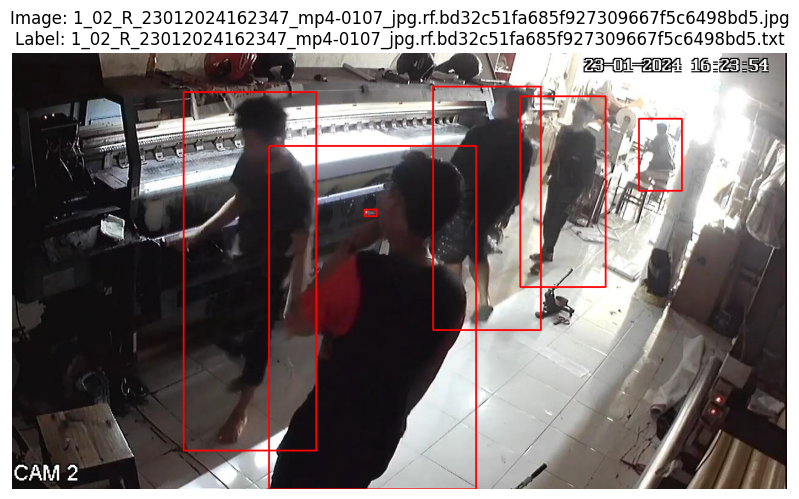

In [ ]:
# prompt: randomly select an image and label pair from "/content/Smoking-Person-Detection-1/train/images" and "/content/Smoking-Person-Detection-1/train/labels". Then plot it out

import random
import matplotlib.pyplot as plt
import cv2
import os

# Define the directories
image_dir = "/content/combined-dataset/train/images"
label_dir = "/content/combined-dataset/train/labels"

# Get list of image files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

if not image_files:
    print("No image files found in the directory.")
else:
    # Randomly select an image file
    random_image_file = random.choice(image_files)
    image_path = os.path.join(image_dir, random_image_file)

    # Construct the corresponding label file path
    label_file_name = os.path.splitext(random_image_file)[0] + ".txt"
    label_path = os.path.join(label_dir, label_file_name)

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
    else:
        # Convert BGR to RGB for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get image dimensions
        img_h, img_w, _ = image.shape

        # Read the label file and draw bounding boxes
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 5:
                        class_id = int(parts[0])
                        xc, yc, bw, bh = map(float, parts[1:])

                        # Convert YOLO format to pixel coordinates
                        x1 = int((xc - bw / 2) * img_w)
                        y1 = int((yc - bh / 2) * img_h)
                        x2 = int((xc + bw / 2) * img_w)
                        y2 = int((yc + bh / 2) * img_h)

                        # Draw the bounding box (Green color, thickness 2)
                        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

                        # Optionally, put class text on the box (simple example)
                        # cv2.putText(image_rgb, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Plot the image with bounding boxes
        plt.figure(figsize=(10, 10))
        plt.imshow(image_rgb)
        plt.title(f"Image: {random_image_file}\nLabel: {label_file_name}")
        plt.axis('off')  # Hide axes
        plt.show()

## **Step 6: Training with the additional Synthetic Dataset**

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/combined-dataset/data.yaml", epochs=50, imgsz=640, batch=16, val=False)

New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/combined-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opse

train: Scanning /content/combined-dataset/train/labels... 4210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4210/4210 [00:02<00:00, 1531.19it/s]

train: New cache created: /content/combined-dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1558.7±802.2 MB/s, size: 83.7 KB)


val: Scanning /content/combined-dataset/valid/labels.cache... 393 images, 1 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.17G     0.9453      1.453       1.11          7        640: 100%|██████████| 264/264 [00:26<00:00,  9.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G     0.9413     0.9856      1.108          5        640: 100%|██████████| 264/264 [00:23<00:00, 11.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.19G     0.9376     0.8854      1.099          8        640: 100%|██████████| 264/264 [00:23<00:00, 11.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.19G     0.9147     0.8021       1.09         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.21G     0.8862     0.7616      1.074          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.22G     0.8439     0.6952      1.054         12        640: 100%|██████████| 264/264 [00:23<00:00, 11.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G     0.8256     0.6764      1.047         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G     0.8137     0.6575      1.045         10        640: 100%|██████████| 264/264 [00:23<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.26G     0.7864     0.6286      1.029         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.28G     0.7743     0.6156      1.023         19        640: 100%|██████████| 264/264 [00:23<00:00, 11.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.29G     0.7672     0.6045      1.026          8        640: 100%|██████████| 264/264 [00:23<00:00, 11.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.29G     0.7442     0.5725      1.011          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.29G     0.7453     0.5789      1.011          7        640: 100%|██████████| 264/264 [00:23<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.29G     0.7271     0.5595      1.003         13        640: 100%|██████████| 264/264 [00:23<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.29G     0.7209     0.5467      1.001         11        640: 100%|██████████| 264/264 [00:23<00:00, 11.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.29G     0.7222     0.5389     0.9987         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.29G     0.7199     0.5292          1         11        640: 100%|██████████| 264/264 [00:22<00:00, 11.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.29G     0.7012     0.5191     0.9916          7        640: 100%|██████████| 264/264 [00:23<00:00, 11.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.29G     0.6951       0.51     0.9823         10        640: 100%|██████████| 264/264 [00:23<00:00, 11.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.29G     0.6869     0.5041     0.9817          7        640: 100%|██████████| 264/264 [00:23<00:00, 11.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.29G     0.6853     0.4881     0.9802         11        640: 100%|██████████| 264/264 [00:23<00:00, 11.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.29G     0.6697     0.4899     0.9769          7        640: 100%|██████████| 264/264 [00:23<00:00, 11.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.29G     0.6689     0.4789     0.9737          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.29G     0.6738     0.4771     0.9793          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.29G       0.66     0.4693     0.9725         12        640: 100%|██████████| 264/264 [00:23<00:00, 11.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.29G     0.6499     0.4722     0.9683          5        640: 100%|██████████| 264/264 [00:23<00:00, 11.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.29G     0.6514     0.4606     0.9713         13        640: 100%|██████████| 264/264 [00:23<00:00, 11.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.29G     0.6393     0.4524     0.9659          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.29G     0.6318     0.4424     0.9613          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.29G     0.6297     0.4427     0.9582          7        640: 100%|██████████| 264/264 [00:23<00:00, 11.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.29G     0.6312     0.4352       0.96         11        640: 100%|██████████| 264/264 [00:23<00:00, 11.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.29G     0.6252     0.4373     0.9565         11        640: 100%|██████████| 264/264 [00:23<00:00, 11.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.29G     0.6254     0.4286     0.9568         16        640: 100%|██████████| 264/264 [00:23<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.29G     0.6066     0.4178      0.944          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.29G     0.6229     0.4208     0.9531          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.29G     0.6118     0.4179     0.9491          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.29G     0.5951     0.4071     0.9403          7        640: 100%|██████████| 264/264 [00:23<00:00, 11.30it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.29G     0.5999      0.409     0.9443          8        640: 100%|██████████| 264/264 [00:23<00:00, 11.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.29G     0.5855     0.3931     0.9362         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.29G     0.5872     0.3953     0.9411         10        640: 100%|██████████| 264/264 [00:23<00:00, 11.31it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.29G     0.6206     0.3761     0.9222          8        640: 100%|██████████| 264/264 [00:23<00:00, 11.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.29G      0.615     0.3669     0.9216          4        640: 100%|██████████| 264/264 [00:22<00:00, 11.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.29G     0.6014     0.3546     0.9075          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.29G     0.5949     0.3482     0.9039          4        640: 100%|██████████| 264/264 [00:22<00:00, 11.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.29G     0.5861     0.3401     0.9039          4        640: 100%|██████████| 264/264 [00:22<00:00, 11.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.29G     0.5822     0.3376        0.9          3        640: 100%|██████████| 264/264 [00:23<00:00, 11.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.29G     0.5712     0.3329      0.895          4        640: 100%|██████████| 264/264 [00:22<00:00, 11.57it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.29G     0.5668     0.3245     0.8913          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.29G     0.5596     0.3231      0.892          8        640: 100%|██████████| 264/264 [00:23<00:00, 11.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.29G     0.5538     0.3186     0.8899          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.51it/s]


                   all        393        901      0.869      0.827       0.87      0.552

50 epochs completed in 0.329 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]


                   all        393        901      0.867      0.827       0.87      0.552
             cigarette        365        367      0.921      0.735       0.85       0.41
                person        385        517      0.986      0.981      0.988      0.855
                 smoke         15         17      0.692      0.765      0.774      0.393
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train5


In [ ]:
import argparse
from ultralytics import YOLO
from ultralytics.data.dataset import YOLODataset
import ultralytics.data.build as build
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

class YOLOWeightedDataset(YOLODataset):
    def __init__(self, *args, mode="train", **kwargs):
        """
        Initialize the WeightedDataset.

        Args:
            class_weights (list or numpy array): A list or array of weights corresponding to each class.
        """

        super(YOLOWeightedDataset, self).__init__(*args, **kwargs)

        self.train_mode = "train" in self.prefix

        # You can also specify weights manually instead
        self.count_instances()
        class_weights = np.sum(self.counts) / self.counts
        self.agg_func = np.mean

        self.class_weights = np.array(class_weights)
        self.weights = self.calculate_weights()
        self.probabilities = self.calculate_probabilities()

    def count_instances(self):
        """
        Count the number of instances per class

        Returns:
            dict: A dict containing the counts for each class.
        """
        self.counts = [0 for i in range(len(self.data["names"]))]
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)
            for id in cls:
                self.counts[id] += 1

        self.counts = np.array(self.counts)
        self.counts = np.where(self.counts == 0, 1, self.counts)

    def calculate_weights(self):
        """
        Calculate the aggregated weight for each label based on class weights.

        Returns:
            list: A list of aggregated weights corresponding to each label.
        """
        weights = []
        for label in self.labels:
            cls = label['cls'].reshape(-1).astype(int)

            # Give a default weight to background class
            if cls.size == 0:
                weights.append(1)
                continue

            # Take mean of weights
            # You can change this weight aggregation function to aggregate weights differently
            # weight = np.mean(self.class_weights[cls])
            # weight = np.max(self.class_weights[cls])
            weight = self.agg_func(self.class_weights[cls])
            weights.append(weight)
        return weights

    def calculate_probabilities(self):
        """
        Calculate and store the sampling probabilities based on the weights.

        Returns:
            list: A list of sampling probabilities corresponding to each label.
        """
        total_weight = sum(self.weights)
        probabilities = [w / total_weight for w in self.weights]
        return probabilities

    def __getitem__(self, index):
        """
        Return transformed label information based on the sampled index.
        """
        # Don't use for validation
        if not self.train_mode:
            return self.transforms(self.get_image_and_label(index))
        else:
            index = np.random.choice(len(self.labels), p=self.probabilities)
            return self.transforms(self.get_image_and_label(index))

# Monkey patch method
build.YOLODataset = YOLOWeightedDataset

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/combined-dataset/data.yaml", epochs=50, imgsz=640, batch=16, val=False)

New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/combined-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opse

train: Scanning /content/combined-dataset/train/labels.cache... 4210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4210/4210 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1366.6±1185.9 MB/s, size: 83.7 KB)


val: Scanning /content/combined-dataset/valid/labels.cache... 393 images, 1 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G     0.9615      1.426      1.094         11        640: 100%|██████████| 264/264 [00:26<00:00,  9.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G     0.9247     0.9364      1.064          4        640: 100%|██████████| 264/264 [00:24<00:00, 10.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G     0.9173     0.8183      1.062          8        640: 100%|██████████| 264/264 [00:23<00:00, 11.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G     0.9031     0.7634      1.059         15        640: 100%|██████████| 264/264 [00:23<00:00, 11.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.18G     0.8517      0.692      1.036         15        640: 100%|██████████| 264/264 [00:23<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.2G     0.8311     0.6688      1.032         19        640: 100%|██████████| 264/264 [00:23<00:00, 11.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.21G     0.8073      0.633      1.016         21        640: 100%|██████████| 264/264 [00:23<00:00, 11.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.23G     0.7866     0.6042      1.007         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.23G     0.7737     0.5793     0.9955         18        640: 100%|██████████| 264/264 [00:23<00:00, 11.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.23G     0.7694      0.566     0.9905         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.23G     0.7208     0.5385     0.9771         13        640: 100%|██████████| 264/264 [00:23<00:00, 11.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.23G     0.7489     0.5435     0.9916         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.23G     0.7189     0.5257     0.9756          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.23G     0.7138      0.508     0.9755         10        640: 100%|██████████| 264/264 [00:23<00:00, 11.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.23G     0.7019     0.5043     0.9685         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.23G     0.7037      0.502     0.9732         22        640: 100%|██████████| 264/264 [00:23<00:00, 11.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.23G      0.668     0.4813     0.9582          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.23G     0.6792     0.4851     0.9641         11        640: 100%|██████████| 264/264 [00:23<00:00, 11.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.23G     0.6715     0.4769     0.9572          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.23G     0.6638     0.4751     0.9594          5        640: 100%|██████████| 264/264 [00:23<00:00, 11.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.23G     0.6463     0.4561     0.9466         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.23G     0.6637     0.4647     0.9563          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G     0.6557     0.4546     0.9522          7        640: 100%|██████████| 264/264 [00:23<00:00, 11.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.23G     0.6475     0.4472     0.9496          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.23G     0.6455     0.4456      0.948         27        640: 100%|██████████| 264/264 [00:23<00:00, 11.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.23G     0.6327     0.4413     0.9441          5        640: 100%|██████████| 264/264 [00:23<00:00, 11.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.23G     0.6211     0.4229     0.9354         22        640: 100%|██████████| 264/264 [00:23<00:00, 11.33it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.23G     0.6194     0.4229     0.9378         10        640: 100%|██████████| 264/264 [00:23<00:00, 11.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.23G     0.6191     0.4172     0.9395          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.23G     0.5991     0.3991     0.9292          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.23G     0.6037       0.41      0.934         18        640: 100%|██████████| 264/264 [00:23<00:00, 11.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.23G      0.604     0.4014     0.9316         11        640: 100%|██████████| 264/264 [00:23<00:00, 11.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.23G     0.5935      0.396     0.9234         13        640: 100%|██████████| 264/264 [00:23<00:00, 11.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.23G     0.5855     0.3912     0.9232          8        640: 100%|██████████| 264/264 [00:23<00:00, 11.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.23G     0.5903      0.393     0.9233          5        640: 100%|██████████| 264/264 [00:23<00:00, 11.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.23G      0.587     0.3918     0.9253          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.23G     0.5687     0.3831     0.9187         13        640: 100%|██████████| 264/264 [00:23<00:00, 11.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.23G     0.5637     0.3736     0.9182         16        640: 100%|██████████| 264/264 [00:23<00:00, 11.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.23G     0.5708     0.3767     0.9161         14        640: 100%|██████████| 264/264 [00:23<00:00, 11.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.23G       0.55     0.3673     0.9103         10        640: 100%|██████████| 264/264 [00:23<00:00, 11.29it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.23G     0.5797     0.3431     0.8949          3        640: 100%|██████████| 264/264 [00:23<00:00, 11.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.23G     0.5806     0.3428     0.8919          3        640: 100%|██████████| 264/264 [00:23<00:00, 11.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.23G     0.5693     0.3349     0.8885          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.23G     0.5609     0.3292     0.8861          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.23G     0.5531     0.3253     0.8856          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.23G     0.5446     0.3185     0.8808          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.23G     0.5368     0.3133     0.8764          8        640: 100%|██████████| 264/264 [00:22<00:00, 11.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.23G     0.5361      0.309     0.8769          3        640: 100%|██████████| 264/264 [00:23<00:00, 11.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.23G     0.5173     0.2999     0.8719          4        640: 100%|██████████| 264/264 [00:23<00:00, 11.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.23G     0.5171     0.2998      0.871          6        640: 100%|██████████| 264/264 [00:23<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.02it/s]


                   all        393        901      0.923      0.874      0.903      0.566

50 epochs completed in 0.332 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.74it/s]


                   all        393        901      0.923      0.874      0.903      0.566
             cigarette        365        367      0.914      0.753      0.826      0.393
                person        385        517      0.987      0.986      0.992      0.849
                 smoke         15         17      0.869      0.882      0.892      0.456
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train6


## **Step 7: Evaluate on CCTV Dataset**

In [ ]:
# Load the best weights from the training run
model = YOLO("/content/runs/detect/train/weights/last.pt")

# Validate the model on the validation and test set
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="val", conf=0.10)
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="test", conf=0.10)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2181.1±505.3 MB/s, size: 113.2 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]


                   all         41        195      0.749      0.746      0.783      0.506
             cigarette         32         33      0.714      0.303      0.538      0.227
                person         41        145       0.96      0.993      0.994      0.829
                 smoke         15         17      0.571      0.941      0.819      0.461
Speed: 2.1ms preprocess, 7.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val13
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2245.3±530.9 MB/s, size: 115.0 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/test/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 1527.95it/s]

val: New cache created: /content/Smoking-CCTV-Detection-4/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


                   all         21        116      0.716       0.65      0.716      0.475
             cigarette         15         15      0.534        0.2      0.373      0.188
                person         21         85      0.971          1      0.995      0.836
                 smoke         13         16      0.642       0.75       0.78      0.401
Speed: 2.1ms preprocess, 15.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val14


In [ ]:
# Load the best weights from the training run
model = YOLO("/content/runs/detect/train2/weights/last.pt")

# Validate the model on the validation and test set
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="val", conf=0.10)
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="test", conf=0.10)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2439.3±587.5 MB/s, size: 112.8 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         41        195      0.709      0.675      0.718       0.48
             cigarette         32         33      0.472      0.242      0.383      0.133
                person         41        145      0.965          1      0.994      0.829
                 smoke         15         17      0.689      0.784      0.776      0.476
Speed: 2.2ms preprocess, 1.4ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/detect/val15
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2745.6±677.0 MB/s, size: 107.2 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/test/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]


                   all         21        116      0.918      0.577      0.661      0.446
             cigarette         15         15      0.767      0.133      0.221     0.0999
                person         21         85      0.988      0.979      0.995      0.831
                 smoke         13         16          1       0.62      0.767      0.407
Speed: 2.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val16


In [ ]:
# Load the best weights from the training run
model = YOLO("/content/runs/detect/train3/weights/last.pt")

# Validate the model on the validation and test set
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="val", conf=0.10)
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="test", conf=0.10)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2482.4±551.4 MB/s, size: 112.2 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]


                   all         41        195      0.848       0.68       0.77      0.447
             cigarette         32         33      0.904      0.285      0.474      0.139
                person         41        145      0.973       0.99      0.994      0.826
                 smoke         15         17      0.668      0.765      0.844      0.376
Speed: 2.2ms preprocess, 1.5ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/val17
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2504.7±476.4 MB/s, size: 108.9 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/test/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


                   all         21        116       0.81      0.687      0.771      0.473
             cigarette         15         15      0.772      0.333      0.535      0.212
                person         21         85      0.958          1      0.995      0.836
                 smoke         13         16      0.699      0.726      0.783      0.372
Speed: 2.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val18


In [ ]:
# Load the best weights from the training run
model = YOLO("/content/runs/detect/train4/weights/last.pt")

# Validate the model on the validation and test set
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="val", conf=0.10)
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="test", conf=0.10)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2217.8±902.6 MB/s, size: 115.7 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]


                   all         41        195      0.876      0.779      0.819      0.527
             cigarette         32         33      0.819      0.455      0.574       0.19
                person         41        145      0.963          1      0.994      0.834
                 smoke         15         17      0.845      0.882      0.888      0.558
Speed: 2.1ms preprocess, 2.5ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/val19
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1738.1±757.5 MB/s, size: 108.4 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/test/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


                   all         21        116      0.843      0.756      0.812      0.499
             cigarette         15         15      0.821      0.467      0.619      0.204
                person         21         85      0.989          1      0.995       0.83
                 smoke         13         16      0.719      0.802      0.822      0.462
Speed: 1.8ms preprocess, 5.0ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val20


In [ ]:
# Load the best weights from the training run
model = YOLO("/content/runs/detect/train5/weights/last.pt")

# Validate the model on the validation and test set
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="val", conf=0.10)
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="test", conf=0.10)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2166.6±1033.3 MB/s, size: 112.6 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]


                   all         41        195      0.781      0.748      0.801        0.5
             cigarette         32         33      0.823      0.423      0.638      0.277
                person         41        145      0.973      0.998      0.994      0.828
                 smoke         15         17      0.546      0.824      0.772      0.396
Speed: 2.1ms preprocess, 1.3ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val21
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2570.6±542.7 MB/s, size: 110.8 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/test/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]


                   all         21        116      0.864      0.715      0.776      0.499
             cigarette         15         15       0.97        0.4      0.548       0.27
                person         21         85      0.993          1      0.995      0.836
                 smoke         13         16      0.629      0.744      0.785       0.39
Speed: 2.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val22


In [ ]:
# Load the best weights from the training run
model = YOLO("/content/runs/detect/train6/weights/last.pt")

# Validate the model on the validation and test set
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="val", conf=0.10)
results = model.val(data="/content/Smoking-CCTV-Detection-4/data.yaml", split="test", conf=0.10)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2594.5±541.3 MB/s, size: 110.2 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]


                   all         41        195      0.937      0.769      0.842       0.49
             cigarette         32         33       0.97      0.424      0.637       0.16
                person         41        145       0.98          1      0.994      0.822
                 smoke         15         17      0.861      0.882      0.896      0.489
Speed: 2.2ms preprocess, 1.4ms inference, 0.0ms loss, 12.4ms postprocess per image
Results saved to runs/detect/val23
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2809.9±682.9 MB/s, size: 107.9 KB)


val: Scanning /content/Smoking-CCTV-Detection-4/test/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


                   all         21        116      0.846      0.777      0.818      0.482
             cigarette         15         15      0.738      0.467      0.607      0.201
                person         21         85      0.977      0.988      0.985      0.826
                 smoke         13         16      0.824      0.875      0.863      0.418
Speed: 4.9ms preprocess, 12.4ms inference, 0.6ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val24


## **Step 8: Export**

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train6/weights/last.pt")
path = model.export(format='onnx', opset=12, simplify=True, dynamic=False, batch=1, imgsz=320)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train6/weights/last.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 7, 2100) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 6.3s, saved as '/content/runs/detect/train6/weights/last.onnx' (11.5 MB)

Export complete (6.6s)
Results saved to /content/runs/detect/train6/weights
Predict:         

In [ ]:
!zip -r /content/combined-dataset.zip /content/combined-dataset

Streaming output truncated to the last 5000 lines.
  adding: content/combined-dataset/train/labels/241130151_867822717271973_5745348064735819111_n_jpg.rf.8842c794bf5184154327865c573a5754.txt (deflated 48%)
  adding: content/combined-dataset/train/labels/a-555-_jpg.rf.814022c6b6b1b91dbd968b3c4a7e141c.txt (deflated 51%)
  adding: content/combined-dataset/train/labels/031_jpg.rf.7787404d1f1c2312efb66bbe03b50528.txt (deflated 56%)
  adding: content/combined-dataset/train/labels/z2743671342620_beb8d3eb5fa728b0ecedd6f0ab4641eb_jpg.rf.c603228bc7517f34b84a3485580d30aa.txt (deflated 42%)
  adding: content/combined-dataset/train/labels/109_jpg.rf.98aee6415e3acc83632d757dc1a252ab.txt (deflated 53%)
  adding: content/combined-dataset/train/labels/081_jpg.rf.69412d5e3768c4a3766df430ff87ed3d.txt (deflated 51%)
  adding: content/combined-dataset/train/labels/1_02_R_23012024162347_mp4-0118_jpg.rf.81157f3bd21c410c6cec6950ccd59fd2.txt (deflated 62%)
  adding: content/combined-dataset/train/labels/a-233-

In [ ]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val27/ (stored 0%)
  adding: content/runs/detect/val27/BoxR_curve.png (deflated 16%)
  adding: content/runs/detect/val27/confusion_matrix_normalized.png (deflated 28%)
  adding: content/runs/detect/val27/val_batch2_pred.jpg (deflated 9%)
  adding: content/runs/detect/val27/val_batch0_pred.jpg (deflated 10%)
  adding: content/runs/detect/val27/BoxF1_curve.png (deflated 17%)
  adding: content/runs/detect/val27/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/val27/BoxP_curve.png (deflated 13%)
  adding: content/runs/detect/val27/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/val27/BoxPR_curve.png (deflated 15%)
  adding: content/runs/detect/val27/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/val27/val_batch0_labels.jpg (deflated 9%)
  adding: content/runs/detect/val27/confusion_matrix.png (deflated 30%)
  adding: content/runs/d